In [6]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [13]:
df = pd.read_csv('k_train.csv')

In [14]:
df

,Roll No,Name,Caoching,High School Marks,12th Appearing,Intermediate Marks,Income,Dummy,School Board,Device to Study,Online Course,Category,PwD,Age,Sex,Passed
0,5467238558,NOOFT MFFYT,NO,80.5,NO,92.2,59000,NO,Maharashtra Board,Laptop,YES,General-EWS,NO,20,M,FAIL
1,5467299091,CXYTK EYIRF,NO,83.3,YES,NaN,390000,NO,BSEB,Phone,YES,ST,NO,18,F,FAIL
2,546729932,UKIFE PPYNH,NO,76.4,YES,NaN,3140000,NO,CBSE,NaN,NaN,OBC-NCL,NO,18,M,FAIL
3,546729181,TZIRV XMAKN,YES,89.7,NO,79.4,345000,YES,HP Board,NaN,NaN,SC,NO,21,M,PASS
4,546724317,NVQJK PVMJH,YES,98.9,NO,95.3,29000,NO,CBSE,NaN,NaN,SC,YES,17,M,PASS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5467264257,CKCAM VXTRB,YES,78.3,NO,94.2,147000,NO,GSEB,Phone,YES,ST,NO,18,M,PASS
99996,5467287876,XCGWA VSXSA,NO,93.7,YES,NaN,442000,NO,CBSE,Tablet,YES,Minority,NO,20,F,FAIL
99997,5467222679,HCIOJ PCODE,YES,76.8,YES,NaN,43000,NO,CBSE,NaN,NaN,General,NO,19,M,PASS
99998,5467225920,ROOAN EYTRE,YES,87.0,NO,96.8,85000,YES,UP Board,NaN,NaN,General-EWS,NO,18,F,PASS


# Exploring the dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Roll No             100000 non-null  int64  
 1   Name                100000 non-null  object 
 2   Caoching            100000 non-null  object 
 3   High School Marks   100000 non-null  float64
 4   12th Appearing      100000 non-null  object 
 5   Intermediate Marks  60069 non-null   float64
 6   Income              100000 non-null  int64  
 7   Dummy               100000 non-null  object 
 8   School Board        100000 non-null  object 
 9   Device to Study     49934 non-null   object 
 10  Online Course       34938 non-null   object 
 11  Category            100000 non-null  object 
 12  PwD                 100000 non-null  object 
 13  Age                 100000 non-null  int64  
 14  Sex                 100000 non-null  object 
 15  Passed              100000 non-null

In [16]:
df.isnull().sum()

Roll No                   0
Name                      0
Caoching                  0
High School Marks         0
12th Appearing            0
Intermediate Marks    39931
Income                    0
Dummy                     0
School Board              0
Device to Study       50066
Online Course         65062
Category                  0
PwD                       0
Age                       0
Sex                       0
Passed                    0
dtype: int64

In [17]:
df.describe()

,Roll No,High School Marks,Intermediate Marks,Income,Age
count,1.000000e+05,100000.000000,60069.000000,1.000000e+05,100000.00000
mean,6.244442e+09,87.471427,87.419339,4.460709e+05,18.50038
std,7.617424e+09,7.261928,7.257124,8.831628e+05,1.71026
min,5.467223e+08,75.000000,75.000000,1.000000e+04,16.00000
25%,5.467227e+09,81.200000,81.100000,6.300000e+04,17.00000
50%,5.467252e+09,87.400000,87.400000,1.810000e+05,18.00000
75%,5.467277e+09,93.800000,93.700000,3.800000e+05,20.00000
max,5.467210e+10,100.000000,100.000000,4.999000e+06,21.00000


In [18]:
df.duplicated().sum()

0

In [19]:
intermediate_mean_marks = df['Intermediate Marks'].mean()

In [21]:
df['Intermediate Marks'].fillna(intermediate_mean_marks, inplace=True)

In [22]:
df.isnull().sum()

Roll No                   0
Name                      0
Caoching                  0
High School Marks         0
12th Appearing            0
Intermediate Marks        0
Income                    0
Dummy                     0
School Board              0
Device to Study       50066
Online Course         65062
Category                  0
PwD                       0
Age                       0
Sex                       0
Passed                    0
dtype: int64

In [26]:
df = pd.get_dummies(df, columns=['Device to Study'], prefix='Device')
df = pd.get_dummies(df, columns=['Online Course'], prefix='Course')

In [27]:
df.isnull().sum()

Roll No               0
Name                  0
Caoching              0
High School Marks     0
12th Appearing        0
Intermediate Marks    0
Income                0
Dummy                 0
School Board          0
Category              0
PwD                   0
Age                   0
Sex                   0
Passed                0
Device_Laptop         0
Device_Phone          0
Device_Tablet         0
Course_YES            0
dtype: int64

In [28]:
correaltion_matrix = df.corr()

In [34]:
plt.figure(figsize=(20,20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

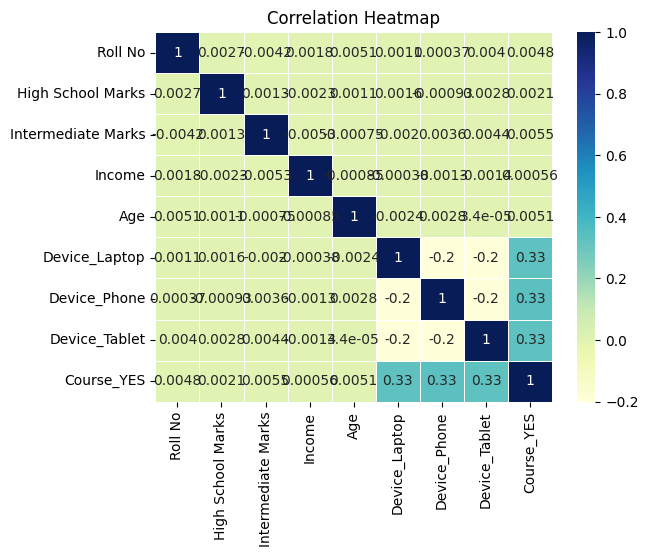

In [35]:
sns.heatmap(correaltion_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [33]:
df

,Roll No,Name,Caoching,High School Marks,12th Appearing,Intermediate Marks,Income,Dummy,School Board,Category,PwD,Age,Sex,Passed,Device_Laptop,Device_Phone,Device_Tablet,Course_YES
0,5467238558,NOOFT MFFYT,NO,80.5,NO,92.200000,59000,NO,Maharashtra Board,General-EWS,NO,20,M,FAIL,1,0,0,1
1,5467299091,CXYTK EYIRF,NO,83.3,YES,87.419339,390000,NO,BSEB,ST,NO,18,F,FAIL,0,1,0,1
2,546729932,UKIFE PPYNH,NO,76.4,YES,87.419339,3140000,NO,CBSE,OBC-NCL,NO,18,M,FAIL,0,0,0,0
3,546729181,TZIRV XMAKN,YES,89.7,NO,79.400000,345000,YES,HP Board,SC,NO,21,M,PASS,0,0,0,0
4,546724317,NVQJK PVMJH,YES,98.9,NO,95.300000,29000,NO,CBSE,SC,YES,17,M,PASS,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5467264257,CKCAM VXTRB,YES,78.3,NO,94.200000,147000,NO,GSEB,ST,NO,18,M,PASS,0,1,0,1
99996,5467287876,XCGWA VSXSA,NO,93.7,YES,87.419339,442000,NO,CBSE,Minority,NO,20,F,FAIL,0,0,1,1
99997,5467222679,HCIOJ PCODE,YES,76.8,YES,87.419339,43000,NO,CBSE,General,NO,19,M,PASS,0,0,0,0
99998,5467225920,ROOAN EYTRE,YES,87.0,NO,96.800000,85000,YES,UP Board,General-EWS,NO,18,F,PASS,0,0,0,0


In [36]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [38]:
from sklearn.preprocessing import LabelEncoder

In [41]:
lblencd = LabelEncoder()

In [42]:
for column in df.select_dtypes(include=['object']):df[column]=lblencd.fit_transform(df[column].astype(str))

In [43]:
df

,Roll No,Name,Caoching,High School Marks,12th Appearing,Intermediate Marks,Income,Dummy,School Board,Category,PwD,Age,Sex,Passed,Device_Laptop,Device_Phone,Device_Tablet,Course_YES
0,5467238558,52161,0,80.5,0,92.200000,59000,0,13,1,0,20,1,0,1,0,0,1
1,5467299091,11317,0,83.3,1,87.419339,390000,0,1,5,0,18,0,0,0,1,0,1
2,546729932,78579,0,76.4,1,87.419339,3140000,0,2,3,0,18,1,0,0,0,0,0
3,546729181,76892,1,89.7,0,79.400000,345000,1,6,4,0,21,1,1,0,0,0,0
4,546724317,53215,1,98.9,0,95.300000,29000,0,2,4,1,17,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5467264257,9255,1,78.3,0,94.200000,147000,0,4,5,0,18,1,1,0,1,0,1
99996,5467287876,88969,0,93.7,1,87.419339,442000,0,2,2,0,20,0,0,0,0,1,1
99997,5467222679,27254,1,76.8,1,87.419339,43000,0,2,0,0,19,1,1,0,0,0,0
99998,5467225920,67618,1,87.0,0,96.800000,85000,1,19,1,0,18,0,1,0,0,0,0


In [44]:
df.drop(columns=['Name', 'Roll No'], inplace=True)

In [45]:
df

,Caoching,High School Marks,12th Appearing,Intermediate Marks,Income,Dummy,School Board,Category,PwD,Age,Sex,Passed,Device_Laptop,Device_Phone,Device_Tablet,Course_YES
0,0,80.5,0,92.200000,59000,0,13,1,0,20,1,0,1,0,0,1
1,0,83.3,1,87.419339,390000,0,1,5,0,18,0,0,0,1,0,1
2,0,76.4,1,87.419339,3140000,0,2,3,0,18,1,0,0,0,0,0
3,1,89.7,0,79.400000,345000,1,6,4,0,21,1,1,0,0,0,0
4,1,98.9,0,95.300000,29000,0,2,4,1,17,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,78.3,0,94.200000,147000,0,4,5,0,18,1,1,0,1,0,1
99996,0,93.7,1,87.419339,442000,0,2,2,0,20,0,0,0,0,1,1
99997,1,76.8,1,87.419339,43000,0,2,0,0,19,1,1,0,0,0,0
99998,1,87.0,0,96.800000,85000,1,19,1,0,18,0,1,0,0,0,0


In [56]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [57]:
# Determine outlier boundaries
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

In [58]:
# Detect outliers
outliers = ((df < lower_boundary) | (df > upper_boundary)).any(axis=1)

In [59]:
# Drop the outliers
df_cleaned = df[~outliers]

# Verify the updated DataFrame
print(df_cleaned.head())

    Caoching  High School Marks  12th Appearing  Intermediate Marks  Income  \
5          0               99.3               1           87.419339   33000   
6          1               86.0               1           87.419339   13000   
8          0               83.0               0           93.500000   59000   
12         0               93.4               0           92.000000   68000   
21         1               88.4               1           87.419339  404000   

    Dummy  School Board  Category  PwD  Age  Sex  Passed  Device_Laptop  \
5       0            13         2    0   21    0       1              0   
6       0            15         4    0   20    1       1              0   
8       0             1         5    0   18    0       0              0   
12      0             1         2    0   21    0       0              0   
21      0            10         2    0   19    1       1              0   

    Device_Phone  Device_Tablet  Course_YES  
5              0            

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [60]:
X = df_cleaned.drop(columns=['Passed'])  # All features except 'Passed'
y = df_cleaned['Passed']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred_lr = lr_model.predict(X_test)

In [64]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [65]:
print(accuracy_lr)

0.5663935987807202


In [66]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
y_pred_rf = rf_model.predict(X_test)

In [68]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [69]:
print(f"Accuracy (Logistic Regression): {accuracy_lr:.4f}")
print(f"Accuracy (Random Forest): {accuracy_rf:.4f}")

Accuracy (Logistic Regression): 0.5664
Accuracy (Random Forest): 0.9196


# Done